# RFM segmenting

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp
import squarify

In [2]:
# Load the data and parse the dates

date_parser = lambda x: datetime.strptime(x, "%Y-%m-%d %H:%M:%S")
df = pd.read_csv('sales_upd.csv',
                 parse_dates=['InvoiceDate'],
                 date_parser = date_parser,
                 dtype={
                     'Invoice' : 'string'
                 })
df.head()

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.4
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.0
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.0
3,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.8
4,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.0


In [3]:
df.dropna(subset=['Customer ID'], how='all', inplace=True)
df

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085.0,United Kingdom,83.40
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085.0,United Kingdom,81.00
3,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085.0,United Kingdom,100.80
4,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085.0,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
1044411,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680.0,France,12.60
1044412,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680.0,France,16.60
1044413,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680.0,France,16.60
1044414,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680.0,France,14.85


In [4]:
df['Customer ID'] = df['Customer ID'].apply(lambda x: f'{x:.0f}')
df['Customer ID'] = df['Customer ID'].astype(str)
df['Customer ID']

0          13085
1          13085
2          13085
3          13085
4          13085
           ...  
1044411    12680
1044412    12680
1044413    12680
1044414    12680
1044415    12680
Name: Customer ID, Length: 805620, dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 805620 entries, 0 to 1044415
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceDate  805620 non-null  datetime64[ns]
 1   Invoice      805620 non-null  string        
 2   StockCode    805620 non-null  object        
 3   Description  805620 non-null  object        
 4   Quantity     805620 non-null  int64         
 5   Price        805620 non-null  float64       
 6   Customer ID  805620 non-null  object        
 7   Country      805620 non-null  object        
 8   Revenue      805620 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4), string(1)
memory usage: 61.5+ MB


In [6]:
today = pd.to_datetime(np.datetime64('2012-01-01 00:00:00'))

In [7]:
df['days_since_today'] = (today - df['InvoiceDate']).dt.days
df

,InvoiceDate,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,Revenue,days_since_today
0,2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085,United Kingdom,83.40,760
1,2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085,United Kingdom,81.00,760
2,2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085,United Kingdom,81.00,760
3,2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085,United Kingdom,100.80,760
4,2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085,United Kingdom,30.00,760
...,...,...,...,...,...,...,...,...,...,...
1044411,2011-12-09 12:50:00,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,12.60,22
1044412,2011-12-09 12:50:00,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,16.60,22
1044413,2011-12-09 12:50:00,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,16.60,22
1044414,2011-12-09 12:50:00,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,12680,France,14.85,22


In [8]:
df_day = df.groupby(['Customer ID'], as_index=False)['days_since_today'].min()
df_day

,Customer ID,days_since_today
0,12346,347
1,12347,24
2,12348,97
3,12349,40
4,12350,332
...,...,...
5876,18283,25
5877,18284,453
5878,18285,682
5879,18286,498


In [9]:
df_f = df.groupby(['Customer ID', 'InvoiceDate'], as_index=False)['Revenue'].sum()
df_f 


,Customer ID,InvoiceDate,Revenue
0,12346,2009-12-14 08:34:00,45.00
1,12346,2009-12-14 11:00:00,22.50
2,12346,2009-12-14 11:02:00,22.50
3,12346,2009-12-18 10:47:00,22.50
4,12346,2009-12-18 10:55:00,1.00
...,...,...,...
36852,18287,2010-09-21 12:19:00,30.60
36853,18287,2010-11-22 11:51:00,381.50
36854,18287,2011-05-22 10:39:00,765.28
36855,18287,2011-10-12 10:23:00,1001.32


In [10]:
df_f = df_f.groupby(['Customer ID'], as_index=False)['Revenue'].count()
df_f


,Customer ID,Revenue
0,12346,12
1,12347,8
2,12348,5
3,12349,4
4,12350,1
...,...,...
5876,18283,22
5877,18284,1
5878,18285,1
5879,18286,2


In [11]:
df_m = df.groupby(['Customer ID'], as_index=False)['Revenue'].sum()
df_m.rename(columns={
    'Revenue': 'Monetary'
}, inplace=True)
df_m

,Customer ID,Monetary
0,12346,77556.46
1,12347,5633.32
2,12348,2019.40
3,12349,4428.69
4,12350,334.40
...,...,...
5876,18283,2736.65
5877,18284,461.68
5878,18285,427.00
5879,18286,1296.43


In [12]:
data_frames = [df_day, df_f, df_m]
df_rfm = reduce(lambda left,right: pd.merge(left, right, on=['Customer ID']), data_frames)
df_rfm

,Customer ID,days_since_today,Revenue,Monetary
0,12346,347,12,77556.46
1,12347,24,8,5633.32
2,12348,97,5,2019.40
3,12349,40,4,4428.69
4,12350,332,1,334.40
...,...,...,...,...
5876,18283,25,22,2736.65
5877,18284,453,1,461.68
5878,18285,682,1,427.00
5879,18286,498,2,1296.43


In [13]:
df_rfm.set_index(['Customer ID'], inplace=True)
df_rfm.rename(columns={
    'days_since_today': 'Recency',
    'Revenue': 'Frequency'
}, inplace=True)
df_rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346,347,12,77556.46
12347,24,8,5633.32
12348,97,5,2019.40
12349,40,4,4428.69
12350,332,1,334.40
...,...,...,...
18283,25,22,2736.65
18284,453,1,461.68
18285,682,1,427.00


In [14]:
# create different bins levels for Recency, Frequency and Monetary

bin_labels_d = [i for i in range(5, 0, -1)]
bin_labels_i = [i for i in range(1, 6)]
df_rfm['Recency Score'] = pd.qcut(df_rfm['Recency'], q = 5, labels=bin_labels_d)

df_rfm['Frequency Score'] = pd.qcut(df_rfm['Frequency'].rank(method='first'), q = 5, labels = bin_labels_i)

df_rfm['Monetary Score'] = pd.qcut(df_rfm['Monetary'], q = 5, labels=bin_labels_i)
df_rfm

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score
Customer ID,,,,,,
12346,347,12,77556.46,2,5,5
12347,24,8,5633.32,5,4,5
12348,97,5,2019.40,3,4,4
12349,40,4,4428.69,5,3,5
12350,332,1,334.40,2,1,2
...,...,...,...,...,...,...
18283,25,22,2736.65,5,5,4
18284,453,1,461.68,1,2,2
18285,682,1,427.00,1,2,2


In [15]:
# Create the RFM columns which is the code of the 3 others columns

df_rfm['RFM'] = df_rfm['Recency Score'].astype(str) + df_rfm['Frequency Score'].astype(str) + df_rfm['Monetary Score'].astype(str)
df_rfm

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM
Customer ID,,,,,,,
12346,347,12,77556.46,2,5,5,255
12347,24,8,5633.32,5,4,5,545
12348,97,5,2019.40,3,4,4,344
12349,40,4,4428.69,5,3,5,535
12350,332,1,334.40,2,1,2,212
...,...,...,...,...,...,...,...
18283,25,22,2736.65,5,5,4,554
18284,453,1,461.68,1,2,2,122
18285,682,1,427.00,1,2,2,122


In [16]:
seg = {
    '11' : 'Hibernating',
    '12' : 'Hibernating',
    '21' : 'Hibernating',
    '22' : 'Hibernating',
    '13' : 'At risk',
    '14' : 'At risk',
    '23' : 'At risk',
    '24' : 'At risk',
    '15' : "Can't lose",
    '25' : "Can't lose",
    '31' : 'About to Sleep',
    '32' : 'About to Sleep',
    '33' : 'Need attention',
    '34' : 'Loyal Customers',
    '35' : 'Loyal Customers',
    '44' : 'Loyal Customers',
    '45' : 'Loyal Customers',
    '41' : 'Promising',
    '51' : 'New Customers',
    '42' : 'Potential Loyalists',
    '43' : 'Potential Loyalists',
    '52' : 'Potential Loyalists',
    '53' : 'Potential Loyalists',
    '54' : 'Champions',
    '55' : 'Champions'
}

l = [seg[x[:2]] for x in df_rfm['RFM']]
df_rfm['Segment'] = l
df_rfm

,Recency,Frequency,Monetary,Recency Score,Frequency Score,Monetary Score,RFM,Segment
Customer ID,,,,,,,,
12346,347,12,77556.46,2,5,5,255,Can't lose
12347,24,8,5633.32,5,4,5,545,Champions
12348,97,5,2019.40,3,4,4,344,Loyal Customers
12349,40,4,4428.69,5,3,5,535,Potential Loyalists
12350,332,1,334.40,2,1,2,212,Hibernating
...,...,...,...,...,...,...,...,...
18283,25,22,2736.65,5,5,4,554,Champions
18284,453,1,461.68,1,2,2,122,Hibernating
18285,682,1,427.00,1,2,2,122,Hibernating


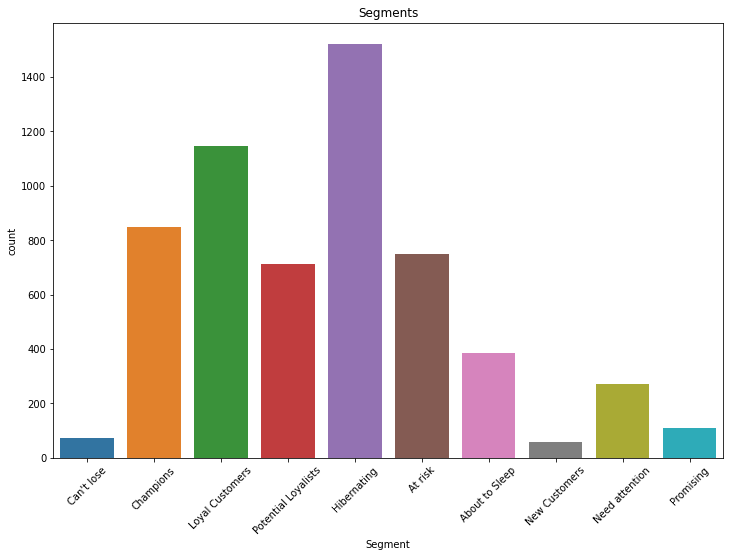

In [17]:
fig = plt.figure(figsize=(12, 8))
sns.countplot(data = df_rfm, x = 'Segment')
plt.xticks(rotation=45)
plt.title('Segments')
plt.show()

In [18]:
cnt = df_rfm['Segment'].value_counts().sort_values().rename_axis('Segment').reset_index(name='Counts')
cnt

,Segment,Counts
0,New Customers,57
1,Can't lose,72
2,Promising,110
3,Need attention,270
4,About to Sleep,387
5,Potential Loyalists,714
6,At risk,750
7,Champions,850
8,Loyal Customers,1148
9,Hibernating,1523


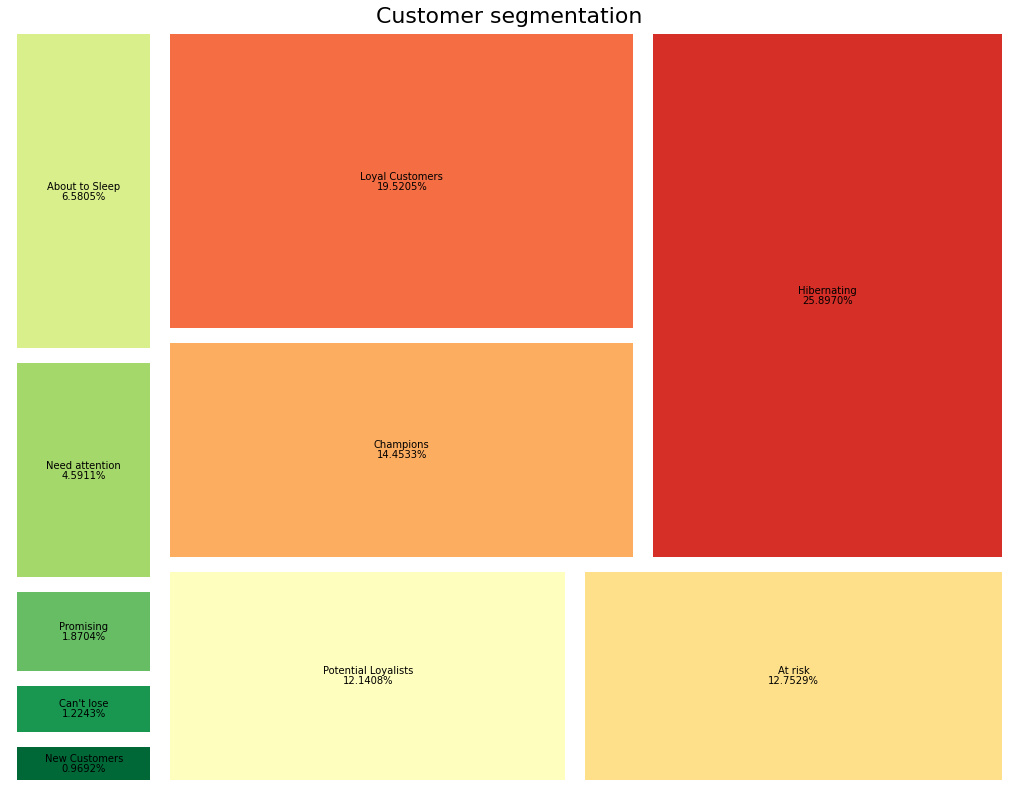

In [19]:
total = cnt['Counts'].sum()
p = [x / total * 100 for x in cnt['Counts']]
p = ['{:.4f}%'.format(x) for x in p]

cmap = mlp.cm.get_cmap('RdYlGn')
mapped_list = [cmap(i) for i in np.arange(1, 0, -1/len(cnt))]

fig = plt.figure(figsize=(18, 14))
squarify.plot(cnt['Counts'], alpha=1, pad = True, label=cnt['Segment'], value=p, color=mapped_list)
plt.axis('off')
mlp.rcParams['text.color'] = 'black'
mlp.rcParams['font.size'] = '14'
plt.text(50, 100,
        'Customer segmentation',
        fontsize = 22,
        color = 'black',
        horizontalalignment = 'center',
        verticalalignment = 'bottom',
        zorder = 20)
plt.show()

Revenue per Segment

In [20]:
df_rfm.groupby('Segment')['Monetary'].sum()

Segment
About to Sleep          206948.153
At risk                1034737.420
Can't lose              596027.112
Champions              9193617.825
Hibernating             666765.662
Loyal Customers        4818064.565
Need attention          344613.840
New Customers            19950.440
Potential Loyalists     827009.491
Promising                35694.670
Name: Monetary, dtype: float64

Average recency per Segment

In [21]:
df_rfm.groupby('Segment')['Recency'].mean()

Segment
About to Sleep         128.589147
At risk                394.632000
Can't lose             355.861111
Champions               30.255294
Hibernating            481.375575
Loyal Customers         89.274390
Need attention         135.259259
New Customers           32.368421
Potential Loyalists     47.235294
Promising               60.281818
Name: Recency, dtype: float64

Average Frequency per Segment

In [22]:
df_rfm.groupby('Segment')['Frequency'].mean()

Segment
About to Sleep          1.359173
At risk                 3.898667
Can't lose             15.694444
Champions              19.154118
Hibernating             1.252791
Loyal Customers         9.776132
Need attention          3.148148
New Customers           1.000000
Potential Loyalists     2.588235
Promising               1.000000
Name: Frequency, dtype: float64

In [23]:
df_rfm.to_csv('sales_rfm.csv')